In [1]:
import numpy as np
import pandas as pd
from scipy import sparse

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

from sklearn import decomposition, preprocessing
from torch.utils.data import Dataset, DataLoader

In [3]:
expr_RNA = pd.read_csv("./data/A549/self_processed/expr_rna.csv", index_col=0).values
data_tensor = torch.FloatTensor(expr_RNA)

In [5]:
# layers will be input -> 100 -> 2 --> 100 -> output
n_features = data_tensor.shape[1]

# first hidden layer of size 100
hidden_layer1 = nn.Linear(in_features=n_features, 
                      out_features= 256)

# second middle layer
hidden_layer2 = nn.Linear(in_features=100, 
                      out_features=2)

# last hidden layer of size 100
hidden_layer3 = nn.Linear(in_features=2,
                        out_features=100)

# the output should be the same size as the input

output_layer4 = nn.Linear(in_features=100,
              out_features=n_features)

activation_1 = nn.ReLU()
activation_3 = nn.ReLU()


In [6]:
def train_model(model, data_tensor, n_epochs=10, learning_rate = 0.01):

    batch_size=100
#     learning_rate = 0.001

    optimizer = optim.SGD(model.parameters(),
                        lr = learning_rate)
    loss_fcn = nn.MSELoss()
    
    print(learning_rate)

    # we'll train the network for 10 epochs
    step = 0
    for epoch in range(n_epochs):
        # randomize the order of the data each time through
        random_order = np.random.permutation(data_tensor.shape[0])
        data_randomized = data_tensor[random_order]

        # train the network on batches of size `batch_size`
        for data_batch in np.array_split(data_randomized, data_randomized.shape[0] // batch_size):

            # update the network weights to minimize the loss
            output = model(data_batch)

            # get loss
            loss = loss_fcn(output, data_batch)

            # print the loss every 100 epochs
            if step % 1000 == 0:
                print("Step: {} Loss: {:.3f}".format(step, loss.item()))

            # backpropagate the loss
            loss.backward()

            # update parameters
            optimizer.step()

            # reset gradients
            optimizer.zero_grad()
            
            step += 1

    return model

In [7]:
autoencoder1 = nn.Sequential(hidden_layer1,
                            activation_1,
                            hidden_layer2,
                            hidden_layer3,
                            activation_3,
                            output_layer4
                            )

autoencoder1 = train_model(autoencoder1, data_tensor, n_epochs = 1000, learning_rate=1e-3)

0.001
Step: 0 Loss: 0.290
Step: 1000 Loss: 0.275
Step: 2000 Loss: 0.268
Step: 3000 Loss: 0.264
Step: 4000 Loss: 0.253
Step: 5000 Loss: 0.245
Step: 6000 Loss: 0.247
Step: 7000 Loss: 0.239
Step: 8000 Loss: 0.244
Step: 9000 Loss: 0.215
Step: 10000 Loss: 0.224
Step: 11000 Loss: 0.223
Step: 12000 Loss: 0.219
Step: 13000 Loss: 0.215
Step: 14000 Loss: 0.217
Step: 15000 Loss: 0.219
Step: 16000 Loss: 0.209
Step: 17000 Loss: 0.214
Step: 18000 Loss: 0.209
Step: 19000 Loss: 0.208
Step: 20000 Loss: 0.210
Step: 21000 Loss: 0.207
Step: 22000 Loss: 0.209
Step: 23000 Loss: 0.215
Step: 24000 Loss: 0.213
Step: 25000 Loss: 0.203
Step: 26000 Loss: 0.208
Step: 27000 Loss: 0.209
Step: 28000 Loss: 0.200
Step: 29000 Loss: 0.193


In [8]:
# let's get the 2D internal hidden layer and visualize it with a scatter plot

with torch.no_grad():
    ae_coordinates = autoencoder1[:3](data_tensor).numpy()

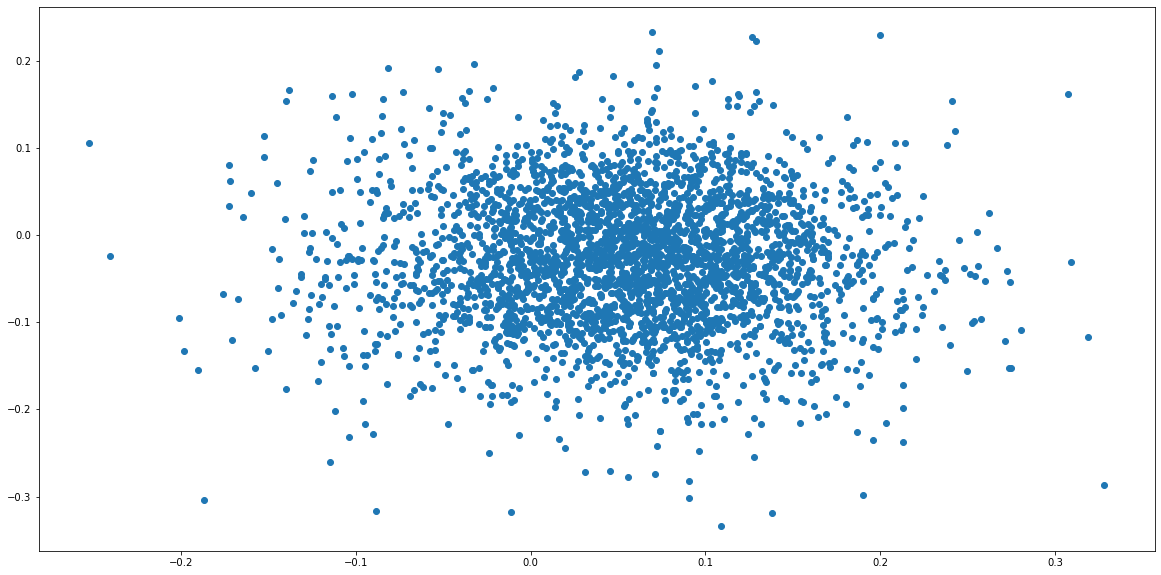

In [9]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot()
ax.scatter(ae_coordinates[:,0], ae_coordinates[:,1])

In [11]:
# layers will be input -> 100 -> 2 --> 100 -> output
n_features = data_tensor.shape[1]

# first hidden layer of size 100
hidden_layer1 = nn.Linear(in_features=n_features, 
                      out_features= 256)

hidden_layer2 = nn.Linear(in_features=256, 
                      out_features= 128)

# second middle layer
hidden_layer3 = nn.Linear(in_features=128, 
                      out_features=2)

# last hidden layer of size 100
hidden_layer4 = nn.Linear(in_features=2,
                        out_features=128)

hidden_layer5 = nn.Linear(in_features=128,
                        out_features=256)
# the output should be the same size as the input

output_layer6 = nn.Linear(in_features=256,
              out_features=n_features)

activation_1 = nn.ReLU()
activation_2 = nn.ReLU()
activation_3 = nn.ReLU()
activation_4 = nn.ReLU()


In [ ]:
autoencoder2 = nn.Sequential(hidden_layer1,
                            activation_1,
                            hidden_layer2,
                            activation_2,
                            hidden_layer3,
                            hidden_layer4,
                            activation_3,
                            hidden_layer5,
                            activation_4,
                            output_layer6
                            )

autoencoder2 = train_model(autoencoder2, data_tensor, n_epochs = 1000, learning_rate=1e-4)

0.0001
Step: 0 Loss: 0.197
Step: 1000 Loss: 0.200
Step: 2000 Loss: 0.194
Step: 3000 Loss: 0.202
Step: 4000 Loss: 0.193
Step: 5000 Loss: 0.196
Step: 6000 Loss: 0.188
Step: 7000 Loss: 0.186
Step: 8000 Loss: 0.201
Step: 9000 Loss: 0.188
Step: 10000 Loss: 0.195
Step: 11000 Loss: 0.190
Step: 12000 Loss: 0.197
Step: 13000 Loss: 0.192
Step: 14000 Loss: 0.198
Step: 15000 Loss: 0.195
Step: 16000 Loss: 0.189
Step: 17000 Loss: 0.195
Step: 18000 Loss: 0.201
Step: 19000 Loss: 0.194
Step: 20000 Loss: 0.192
